

This is the code will analyze the imputation results on the masked data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas
from pandas.core.frame import DataFrame
import numpy as np

This next code will check the indices where the masked data is different than the original data on the imputated data counts (using results from the desired imputation technique). We want to see how well the imputation restored the places that were randomly masked. 

## Read Prepare Data

In [6]:
# read counts of original and masked data
original_counts = pandas.read_csv('/content/drive/MyDrive/Gene_expression_counts_surprot_data.csv')
masked_counts = pandas.read_csv('/content/drive/MyDrive/masked_surprot_counts.csv')

In [7]:
original_counts = original_counts.set_index('Unnamed: 0')
masked_counts = masked_counts.set_index('Unnamed: 0')

In [8]:
# convert to numpy
original_counts_np = original_counts.to_numpy()
masked_counts_np = masked_counts.to_numpy()

In [9]:
masked_counts_tran = masked_counts.transpose()

In [10]:
# Upload DeepImpute results 
masked_counts_imputed = pandas.read_csv('/content/drive/MyDrive/masked_counts_deepimpute.csv')
# to uplaod imputed counts by MAGIC uncomment the line below
# masked_counts_imputed = pandas.read_csv('/content/drive/MyDrive/masked_counts_MAGIC.csv')

In [12]:
masked_counts_imputed = masked_counts_imputed.set_index('Unnamed: 0')

In [13]:
masked_counts_imputed = masked_counts_imputed.transpose()

In [14]:
# convert to numpy
masked_counts_imputed_np = masked_counts_imputed.to_numpy()

## Data Analysis

In [15]:
# extract indices where original data was masked
not_equal_idx = np.where(np.not_equal(original_counts, masked_counts))
not_equal_idx[0].shape

In [17]:
# extract original, masked and imputed values at masked indices
orig_vals_at_dif_idx = original_counts_np[not_equal_idx[0], not_equal_idx[1]]
masked_vals_at_dif_idx = masked_counts_np[not_equal_idx[0], not_equal_idx[1]]
masked_imputed_vals_at_dif_idx = masked_counts_imputed_np[not_equal_idx[0], not_equal_idx[1]]

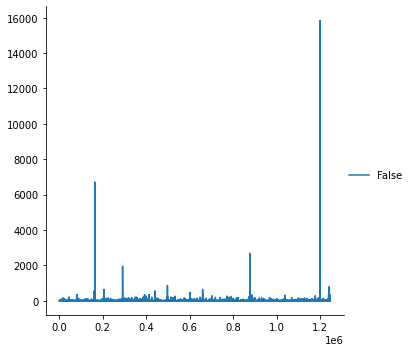

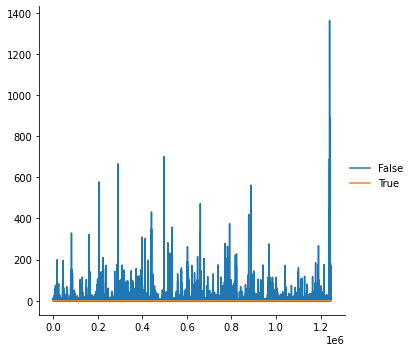

In [47]:
# Generate plot of original vs. imputed values at masked indices
import seaborn as sns
orig_vals_at_dif_idx.shape
sns.relplot(
    x=np.arange(orig_vals_at_dif_idx.shape[0]),
    y=orig_vals_at_dif_idx,
    hue=orig_vals_at_dif_idx==0,
    kind='line',
    ci=None,
)

sns.relplot(
    x=np.arange(masked_imputed_vals_at_dif_idx.shape[0]),
    y=masked_imputed_vals_at_dif_idx,
    hue=masked_imputed_vals_at_dif_idx==0,
    kind='line',
    ci=None,
)

In [21]:
def rmsd(vec1, vec2):
  return np.sqrt(np.mean(np.power((vec1 - vec2),2)))

In [22]:
print("orig to masked RMSD", rmsd(orig_vals_at_dif_idx, masked_vals_at_dif_idx))
print("orig to imputed RMSD", rmsd(orig_vals_at_dif_idx, masked_imputed_vals_at_dif_idx))
print("percent masked vals still zero after impute", 
      f"{(sum(masked_imputed_vals_at_dif_idx == 0) / len(masked_imputed_vals_at_dif_idx))*100:.2f}%")

orig to masked RMSD 20.816267222695668
orig to imputed RMSD 18.848118351867008
percent masked vals still zero after impute 54.69%


In [23]:
equal_idx = np.where(np.equal(original_counts, masked_counts))
nonmasked_imputed_vals_at_dif_idx = masked_counts_imputed_np[equal_idx[0], equal_idx[1]]
nonmasked_orig_vals_at_dif_idx = original_counts_np[equal_idx[0], equal_idx[1]]

import torch
nonmasked_imputed_vals_at_dif_idx = torch.from_numpy(nonmasked_imputed_vals_at_dif_idx).cuda()
nonmasked_orig_vals_at_dif_idx = torch.from_numpy(nonmasked_orig_vals_at_dif_idx).cuda()

print("How many zeros we had before imputation in nonmasked data (percent):", 
      f"{((nonmasked_orig_vals_at_dif_idx == 0).sum() / len(nonmasked_orig_vals_at_dif_idx))*100:.2f}%")
print("How many zeros we still have after imputation in nonmasked data (percent):", 
      f"{((nonmasked_imputed_vals_at_dif_idx == 0).sum() / len(nonmasked_imputed_vals_at_dif_idx))*100:.2f}%")


How many zeros we had before imputation in nonmasked data (percent): 95.73%
How many zeros we still have after imputation in nonmasked data (percent): 91.87%
